In [248]:
## importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [207]:
## importing data 
df= pd.read_csv("D:/Lecture file/30 th lecture 20 april/Files/5. Clustering/crime_data.csv",index_col =0)
df.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## cleaning and checking data

In [210]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [305]:
print(f'describe table for crime data : \n {df.describe()}')

describe table for crime data : 
          Murder     Assault   UrbanPop       Rape    Cluster  Agglo_Cluster
count  50.00000   50.000000  50.000000  50.000000  50.000000      50.000000
mean    7.78800  170.760000  65.540000  21.232000   0.420000       0.880000
std     4.35551   83.337661  14.474763   9.366385   0.498569       0.824126
min     0.80000   45.000000  32.000000   7.300000   0.000000       0.000000
25%     4.07500  109.000000  54.500000  15.075000   0.000000       0.000000
50%     7.25000  159.000000  66.000000  20.100000   0.000000       1.000000
75%    11.25000  249.000000  77.750000  26.175000   1.000000       2.000000
max    17.40000  337.000000  91.000000  46.000000   1.000000       2.000000


In [213]:
X =df[['Murder', 'Assault', 'UrbanPop', 'Rape']]
X

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


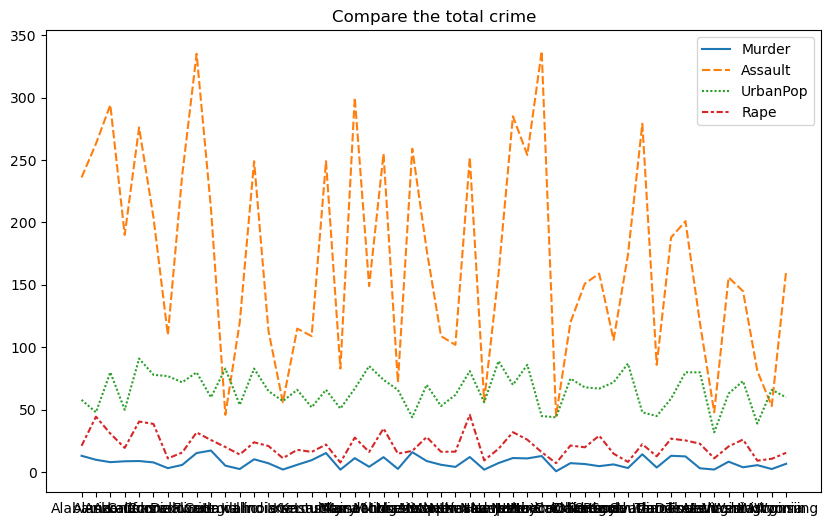

In [353]:
plt.figure(figsize = (10,6))
sns.lineplot(X)
plt.title("Compare the total crime" )
plt.show()

### k - mean value 

In [311]:
# Use the Elbow method to find the optimal number of clusters
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\ZORO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ZORO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ZORO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ZORO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

[355807.8216,
 96399.02814449917,
 47964.26535714286,
 34728.629357142854,
 24499.388190476187,
 21781.098107142858,
 16132.07525,
 15432.733166666667,
 12646.392333333333,
 10468.535476190475]

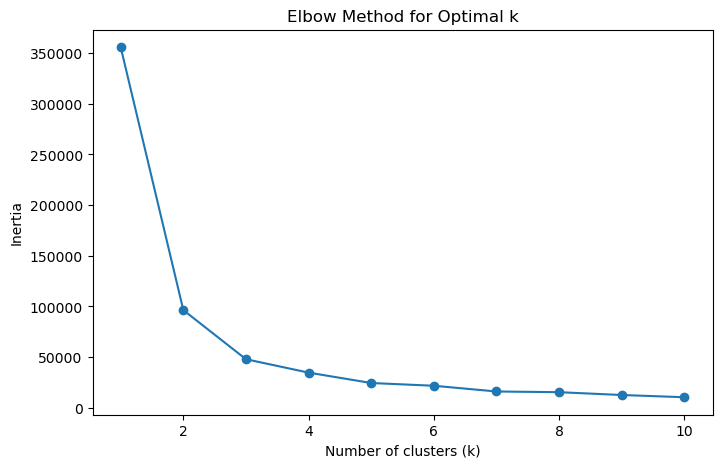

In [218]:
## elbow line chart for clustring
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [220]:
##scatter plot no murder, rape , assult by urban pop

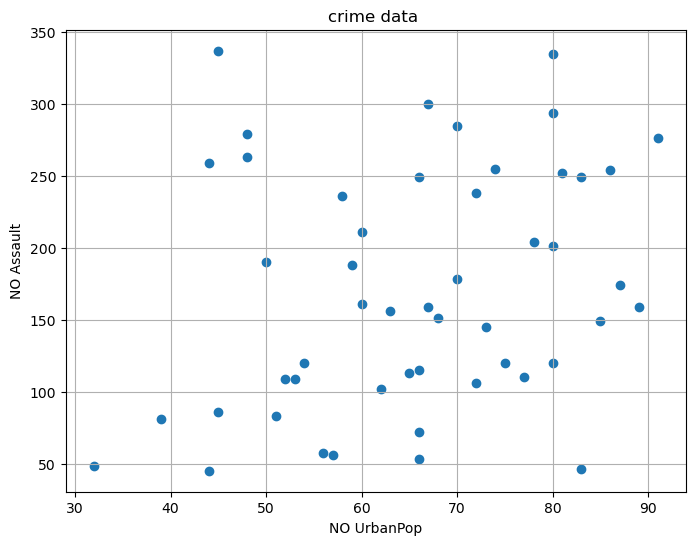

In [223]:
plt.figure(figsize=(8,6))
plt.scatter( X['UrbanPop'],X['Assault'],)
plt.xlabel('NO UrbanPop')
plt.ylabel('NO Assault')
plt.title('crime data ')
plt.grid(True)
plt.show()

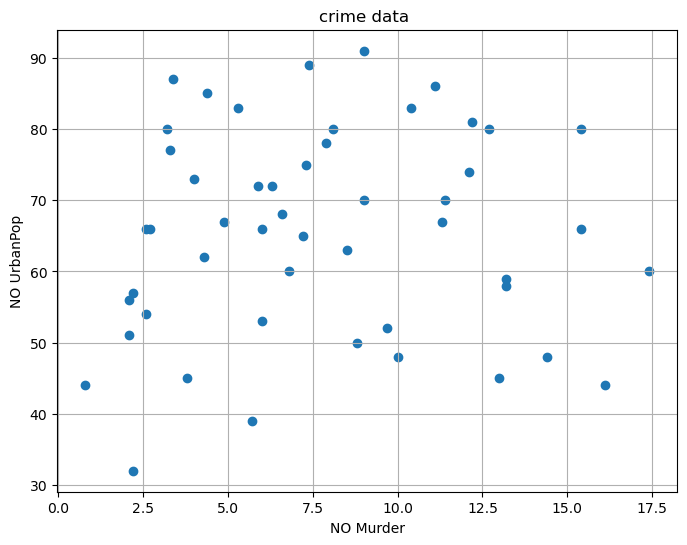

In [224]:
plt.figure(figsize=(8,6))
plt.scatter(X['Murder'], X['UrbanPop'])
plt.xlabel('NO Murder')
plt.ylabel('NO UrbanPop')
plt.title('crime data ')
plt.grid(True)
plt.show()

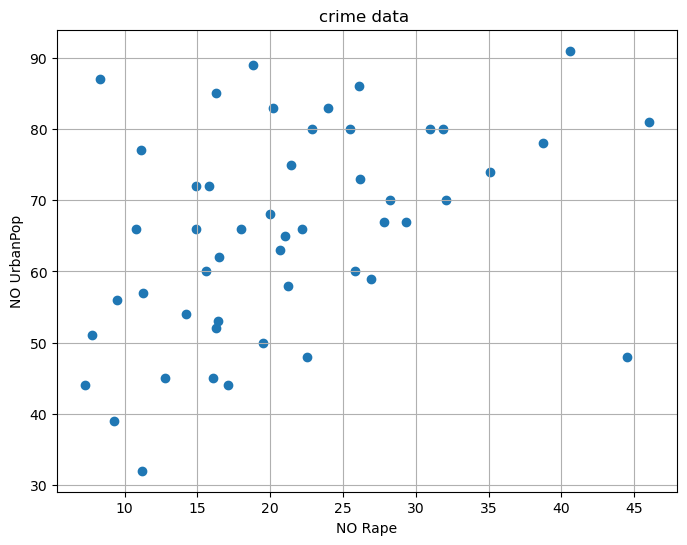

In [225]:
plt.figure(figsize=(8,6))
plt.scatter(X['Rape'], X['UrbanPop'])
plt.xlabel('NO Rape')
plt.ylabel('NO UrbanPop')
plt.title('crime data ')
plt.grid(True)
plt.show()

In [313]:
kmeans = KMeans(n_clusters= 2, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

C:\Users\ZORO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [315]:
df[df['Cluster']==1]

,Murder,Assault,UrbanPop,Rape,Cluster,Agglo_Cluster
Alabama,13.2,236,58,21.2,1,1
Alaska,10.0,263,48,44.5,1,1
Arizona,8.1,294,80,31.0,1,1
Arkansas,8.8,190,50,19.5,1,2
California,9.0,276,91,40.6,1,1
Colorado,7.9,204,78,38.7,1,2
Delaware,5.9,238,72,15.8,1,1
Florida,15.4,335,80,31.9,1,1
Georgia,17.4,211,60,25.8,1,2
Illinois,10.4,249,83,24.0,1,1



### visualization of k-mean clustering 

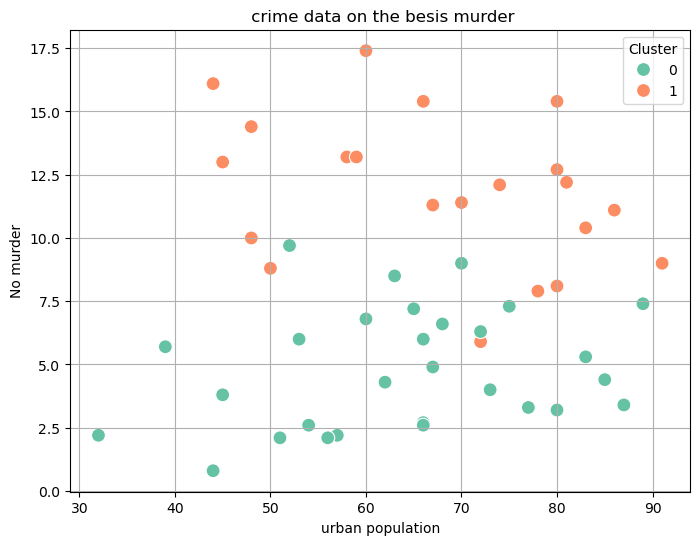

In [297]:
## scatterplot on murder by using k-mean cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'UrbanPop', y = 'Murder', hue = 'Cluster', data = df, palette='Set2',s = 100)
plt.title(' crime data on the besis murder')
plt.xlabel('urban population')
plt.ylabel('No murder')
plt.grid(True)
plt.show()

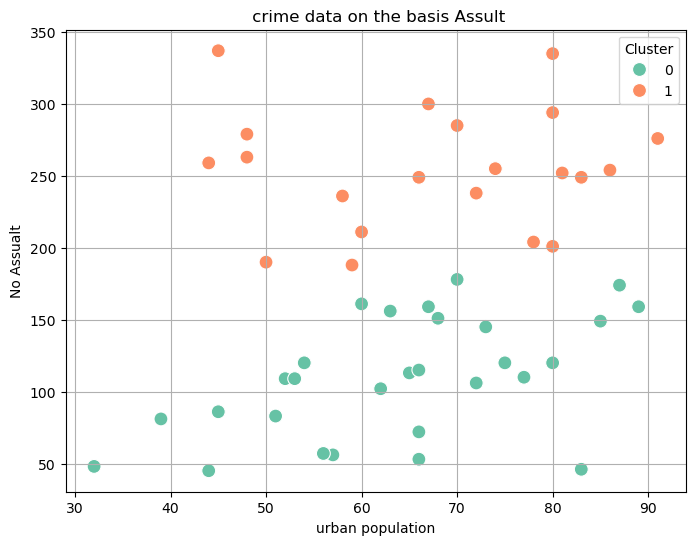

In [299]:
## scatterplot  on assult by using k mean cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'UrbanPop', y = 'Assault', hue = 'Cluster', data = df, palette='Set2',s = 100)
plt.title(' crime data on the basis Assult')
plt.xlabel('urban population')
plt.ylabel('No Assualt')
plt.grid(True)
plt.show()

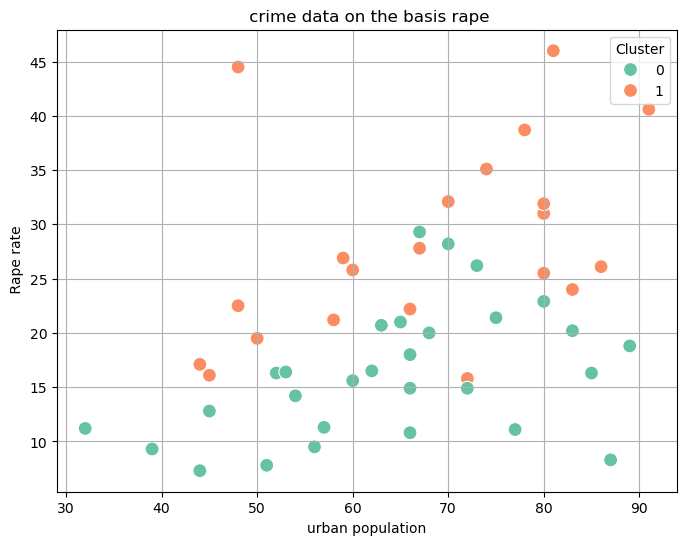

In [301]:
## scatterplot on rape by using k-mean cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'UrbanPop', y = 'Rape', hue = 'Cluster', data = df, palette='Set2',s = 100)
plt.title(' crime data on the basis rape')
plt.xlabel('urban population')
plt.ylabel(' Rape rate')
plt.grid(True)
plt.show()

In [303]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(df)
sil_kmeans = silhouette_score(X,cluster_labels)

C:\Users\ZORO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### k-mean score

In [246]:
print(f"silhouete Score for crime data - k_mean :{sil_kmeans}")

silhouete Score for crime data - k_mean :0.592655441935794


## Hierarchical clustering

In [317]:
#### Create a Linkage Matrix
linked = linkage(X, method = 'ward')
linked

array([[ 14.        ,  28.        ,   2.29128785,   2.        ],
       [ 16.        ,  25.        ,   3.8340579 ,   2.        ],
       [ 13.        ,  15.        ,   3.92937654,   2.        ],
       [ 12.        ,  31.        ,   6.23698645,   2.        ],
       [ 34.        ,  43.        ,   6.63777071,   2.        ],
       [ 35.        ,  45.        ,   7.35527022,   2.        ],
       [  6.        ,  37.        ,   8.0274529 ,   2.        ],
       [ 18.        ,  40.        ,   8.53756406,   2.        ],
       [ 20.        ,  29.        ,  11.45643924,   2.        ],
       [ 47.        ,  57.        ,  11.6511802 ,   3.        ],
       [ 48.        ,  50.        ,  11.71110584,   3.        ],
       [ 49.        ,  55.        ,  12.08994072,   3.        ],
       [  3.        ,  41.        ,  12.61427762,   2.        ],
       [ 33.        ,  44.        ,  13.04492238,   2.        ],
       [ 21.        ,  27.        ,  13.29736816,   2.        ],
       [  2.        ,  30

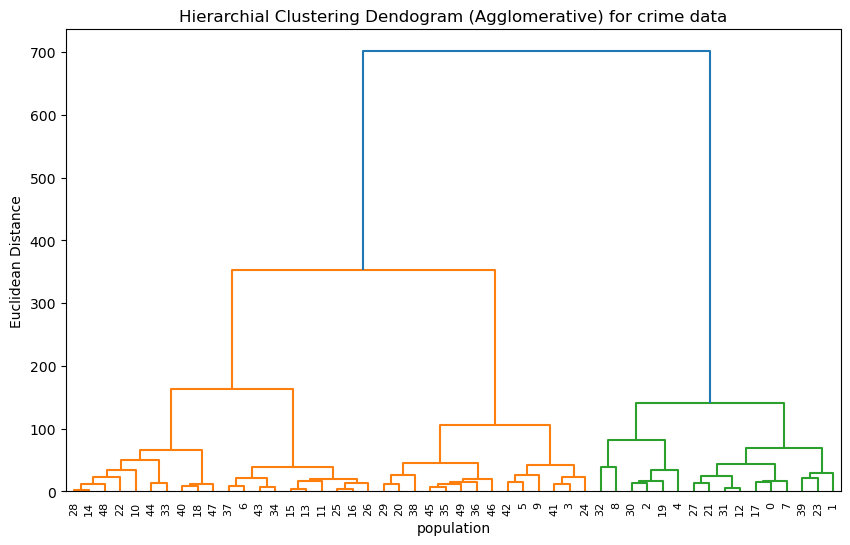

In [363]:
## denodogram 
plt.figure(figsize=(10,6))
dendrogram(linked, orientation='top',distance_sort='descending',show_leaf_counts=False)
plt.title('Hierarchial Clustering Dendogram (Agglomerative) for crime data')
plt.xlabel('population')
plt.ylabel('Euclidean Distance')
plt.show()

In [323]:
agg = AgglomerativeClustering(n_clusters=4,linkage='ward')
df['Agglo_Cluster'] = agg.fit_predict(X)
df

,Murder,Assault,UrbanPop,Rape,Cluster,Agglo_Cluster
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,0
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,1,2
California,9.0,276,91,40.6,1,0
Colorado,7.9,204,78,38.7,1,2
Connecticut,3.3,110,77,11.1,0,3
Delaware,5.9,238,72,15.8,1,0
Florida,15.4,335,80,31.9,1,0
Georgia,17.4,211,60,25.8,1,2


## visualization of Agglomeritve clustering 

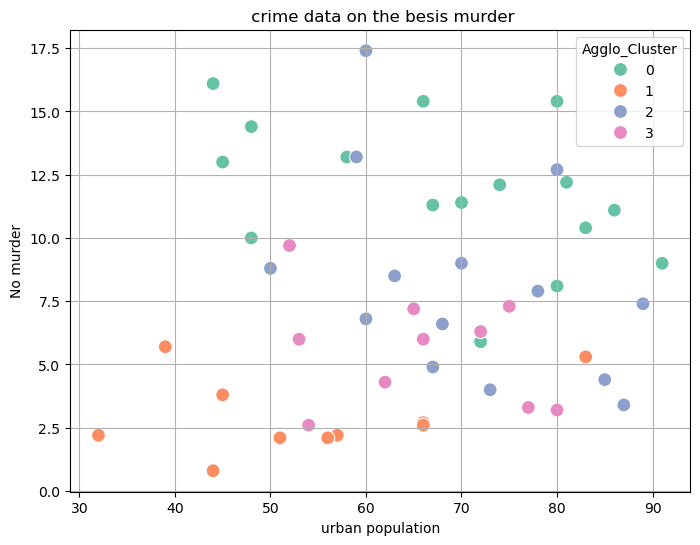

In [325]:
## scatterplot on murder by using agglomeritve cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'UrbanPop', y = 'Murder', hue = 'Agglo_Cluster', data = df, palette='Set2',s = 100)
plt.title(' crime data on the besis murder')
plt.xlabel('urban population')
plt.ylabel('No murder')
plt.grid(True)
plt.show()

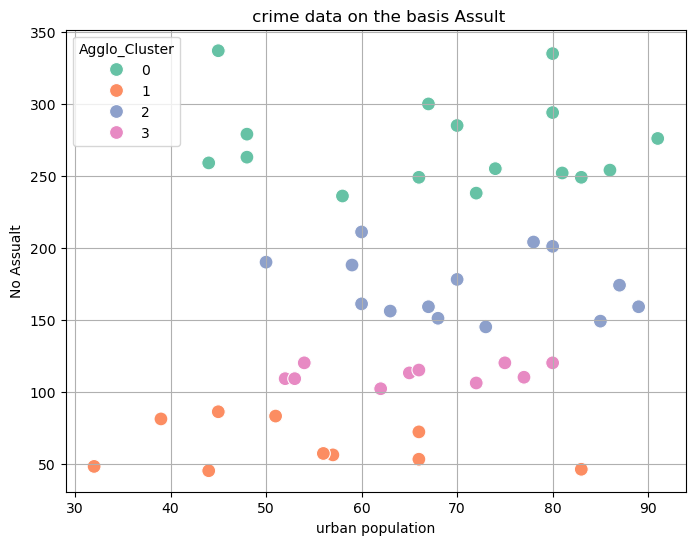

In [327]:
## scatterplot on assult by using agglomeritve cluster
sns.scatterplot(x= 'UrbanPop', y = 'Assault', hue = 'Agglo_Cluster', data = df, palette='Set2',s = 100)
plt.title(' crime data on the basis Assult')
plt.xlabel('urban population')
plt.ylabel('No Assualt')
plt.grid(True)
plt.show()

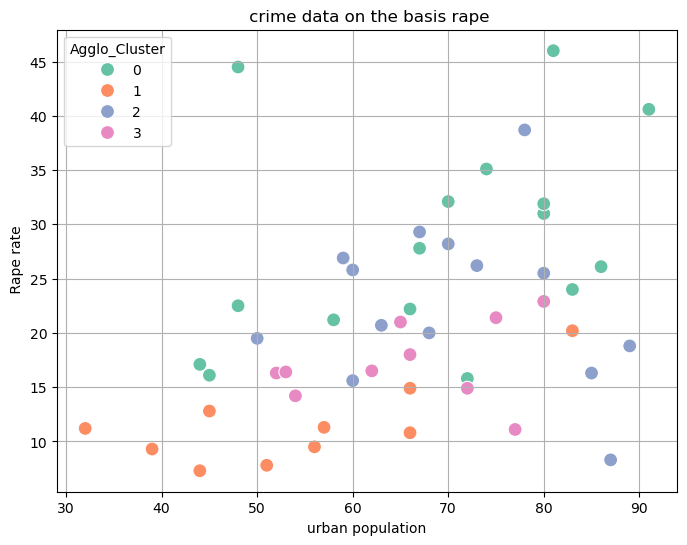

In [331]:
## scatterplot on rape by using agglomeritve cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'UrbanPop', y = 'Rape', hue = 'Agglo_Cluster', data = df, palette='Set2',s = 100)
plt.title(' crime data on the basis rape')
plt.xlabel('urban population')
plt.ylabel(' Rape rate')
plt.grid(True)
plt.show()

In [333]:
agg = AgglomerativeClustering(n_clusters=5,linkage='ward')
agg_labels = agg.fit_predict(X)
sil_agg = silhouette_score(X,agg_labels)


### Aggolomerative score

In [339]:
print(f"silhouete Score for crime data - Aggolomerative : {sil_agg}")

silhouete Score for crime data - Aggolomerative : 0.4387611281666682
